IMPORT MODULE

In [27]:
import pandas as pd
import numpy as npt
import seaborn as sns
from matplotlib import pyplot as plt
import statistics as stat
from scipy.stats import shapiro
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.sandbox.stats.runs import runstest_1samp

STORE DATA

In [28]:
#INFLASI UMUM
df_inflasi = pd.read_csv('./fix_dataset/Data Inflasi 2003 - 2022.csv')
df_inflasi_2023 = pd.read_csv('./fix_dataset/Data Inflasi 2023.csv')
#INFLASI PENDIDIKAN
df_ip_pendidikan_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Pendidikan.csv')
df_ip_pendidikan_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Pendidikan.csv')
df_ip_pendidikan_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Pendidikan.csv')
df_ip_pendidikan_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Pendidikan.csv')

df_ip_menengah_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Menengah.csv')
df_ip_menengah_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Menengah.csv')
df_ip_menengah_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Menengah.csv')
df_ip_menengah_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Menengah.csv')

df_ip_tinggi_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Tinggi.csv')
df_ip_tinggi_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Tinggi.csv')
df_ip_tinggi_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Tinggi.csv')
df_ip_tinggi_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Tinggi.csv')

df_ip_lainnya_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Lainnya.csv')
df_ip_lainnya_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Lainnya.csv')
df_ip_lainnya_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Lainnya.csv')
df_ip_lainnya_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Lainnya.csv')



In [29]:

# #INFLASI TAHUN KALENDER PENDIDIKAN
# df_tp_kurpel_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Pendidikan.csv')
# df_tp_perlengkapan_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Perlengkapan.csv')

# df_tp_kurpel_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Pendidikan.csv')
# df_tp_perlengkapan_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Perlengkapan.csv')

# df_tp_kurpel_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Pendidikan.csv')
# df_tp_perlengkapan_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Perlengkapan.csv')

# df_tp_kurpel_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Pendidikan.csv')
# df_tp_perlengkapan_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Perlengkapan.csv')

# df_tp_kurpel_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Pendidikan.csv')
# df_tp_perlengkapan_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Perlengkapan.csv')

# df_tp_kurpel_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Pendidikan.csv')
# df_tp_perlengkapan_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Perlengkapan.csv')

# DATA CLEANING

* DATA INFLASI UMUM

In [30]:
df_inflasi.head()

,Month,Inflasi
0,12/01/2022,5.51 %
1,11/01/2022,5.42 %
2,10/01/2022,5.71 %
3,09/01/2022,5.95 %
4,08/01/2022,4.69 %


In [31]:
#Clean data, object->date and float
df_inflasi["Inflasi"] = df_inflasi["Inflasi"].str.replace(" %", "")
df_inflasi["Inflasi"] = pd.to_numeric(df_inflasi["Inflasi"], errors="coerce")
df_inflasi['Inflasi'] = df_inflasi['Inflasi'] * 0.01

In [32]:
df_inflasi['Month'] = pd.to_datetime(df_inflasi['Month'], format='%m/%d/%Y')

In [33]:
df_inflasi

,Month,Inflasi
0,2022-12-01,0.0551
1,2022-11-01,0.0542
2,2022-10-01,0.0571
3,2022-09-01,0.0595
4,2022-08-01,0.0469
...,...,...
235,2003-05-01,0.0715
236,2003-04-01,0.0762
237,2003-03-01,0.0717
238,2003-02-01,0.0760


In [34]:
df_inflasi_2023.head()

,Month,Inflasi
0,12/01/2023,2.61 %
1,11/01/2023,2.86 %
2,10/01/2023,2.56 %
3,09/01/2023,2.28 %
4,08/01/2023,3.27 %


In [35]:
#Clean data, object->date and float
df_inflasi_2023["Inflasi"] = df_inflasi_2023["Inflasi"].str.replace(" %", "")
df_inflasi_2023["Inflasi"] = pd.to_numeric(df_inflasi_2023["Inflasi"], errors="coerce")
df_inflasi_2023['Inflasi'] = df_inflasi_2023['Inflasi'] * 0.01

In [36]:
df_inflasi_2023['Month'] = pd.to_datetime(df_inflasi_2023['Month'], format='%m/%d/%Y')

In [37]:
df_inflasi_2023

,Month,Inflasi
0,2023-12-01,0.0261
1,2023-11-01,0.0286
2,2023-10-01,0.0256
3,2023-09-01,0.0228
4,2023-08-01,0.0327
5,2023-07-01,0.0308
6,2023-06-01,0.0352
7,2023-05-01,0.0400
8,2023-04-01,0.0433
9,2023-03-01,0.0497


In [38]:
print('Data Inflasi Umum 2003-2022:\n',df_inflasi.dtypes)
print('Data Inflasi Umum 2023:\n',df_inflasi_2023.dtypes)

Data Inflasi Umum 2003-2022:
 Month      datetime64[ns]
Inflasi           float64
dtype: object
Data Inflasi Umum 2023:
 Month      datetime64[ns]
Inflasi           float64
dtype: object


* DATA INFLASI PENDIDIKAN [PENDIDIKAN]

In [39]:
print('NAN Data:\n',df_ip_pendidikan_2020.isna().sum())
print('Type Data:\n',df_ip_pendidikan_2021.dtypes)

NAN Data:
 Kota          0
01/01/2020    0
01/02/2020    0
01/03/2020    0
01/04/2020    0
01/05/2020    0
01/06/2020    0
01/07/2020    0
01/08/2020    0
01/09/2020    0
01/10/2020    0
01/11/2020    0
01/12/2020    0
dtype: int64
Type Data:
 Kota           object
01/01/2021    float64
01/02/2021    float64
01/03/2021    float64
01/04/2021    float64
01/05/2021    float64
01/06/2021    float64
01/07/2021    float64
01/08/2021    float64
01/09/2021    float64
01/10/2021    float64
01/11/2021    float64
01/12/2021    float64
dtype: object


* DATA INFLASI PENDIDIKAN
- Melakukan cleaning data inflasi pendidikan
- Melakukan transpose data untuk menjadikan kota sebagai features
- Menggabungkan data inflasi pendidikan pertahun dan per kategori

In [40]:
df_ip_pendidikan_2020.head(91)

,Kota,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020
0,KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,0.00,0.0
1,KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,0.00,0.0
2,KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,0.00,0.0
3,KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
4,KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,0.00,0.0
87,MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.0
88,TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,0.00,0.0
89,KOTA JAYAPURA,0.00,0.00,0.00,0.0,0.0,0.0,0.27,3.44,0.00,0.00,0.00,0.0


In [59]:
i = 1
for kota in df_ip_pendidikan_2020['Kota']:
    print(i,kota);i = i + 1

1 KOTA MEULABOH
2 KOTA BANDA ACEH
3 KOTA LHOKSEUMAWE
4 KOTA SIBOLGA
5 KOTA PEMATANG SIANTAR
6 KOTA MEDAN
7 KOTA PADANGSIDIMPUAN
8 KOTA GUNUNGSITOLI
9 KOTA PADANG
10 KOTA BUKITTINGGI
11 TEMBILAHAN
12 KOTA PEKANBARU
13 KOTA DUMAI
14 BUNGO
15 KOTA JAMBI
16 KOTA PALEMBANG
17 KOTA LUBUKLINGGAU
18 KOTA BENGKULU
19 KOTA BANDAR LAMPUNG
20 KOTA METRO
21 TANJUNG PANDAN
22 KOTA PANGKAL PINANG
23 KOTA BATAM
24 KOTA TANJUNG PINANG
25 DKI JAKARTA
26 KOTA BOGOR
27 KOTA SUKABUMI
28 KOTA BANDUNG
29 KOTA CIREBON
30 KOTA BEKASI
31 KOTA DEPOK
32 KOTA TASIKMALAYA
33 CILACAP
34 PURWOKERTO
35 KUDUS
36 KOTA SURAKARTA
37 KOTA SEMARANG
38 KOTA TEGAL
39 KOTA YOGYAKARTA
40 JEMBER
41 BANYUWANGI
42 SUMENEP
43 KOTA KEDIRI
44 KOTA MALANG
45 KOTA PROBOLINGGO
46 KOTA MADIUN
47 KOTA SURABAYA
48 KOTA TANGERANG
49 KOTA CILEGON
50 KOTA SERANG
51 SINGARAJA
52 KOTA DENPASAR
53 KOTA MATARAM
54 KOTA BIMA
55 WAINGAPU
56 MAUMERE
57 KOTA KUPANG
58 SINTANG
59 KOTA PONTIANAK
60 KOTA SINGKAWANG
61 SAMPIT
62 KOTA PALANGKA RAYA
63 KOT

In [60]:
df_ip_pendidikan_2020_transpose = df_ip_pendidikan_2020.set_index('Kota').transpose()
# df_ip_pendidikan_2020_transpose = df_ip_pendidikan_2020_transpose.rename(columns={'Kota':'Periode'}, inplace=True)
# df_ip_pendidikan_2020_transpose.head()

Kota,KOTA MEULABOH,KOTA BANDA ACEH,KOTA LHOKSEUMAWE,KOTA SIBOLGA,KOTA PEMATANG SIANTAR,KOTA MEDAN,KOTA PADANGSIDIMPUAN,KOTA GUNUNGSITOLI,KOTA PADANG,KOTA BUKITTINGGI,...,MAMUJU,KOTA AMBON,KOTA TUAL,KOTA TERNATE,MANOKWARI,KOTA SORONG,MERAUKE,TIMIKA,KOTA JAYAPURA,INDONESIA
01/01/2020,0.0,0.03,0.0,2.58,0.0,0.0,0.0,0.0,0.00,0.23,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,-0.14
01/02/2020,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,1.51,0.0,0.0,0.0,0.00,0.0,0.0,0.02
01/03/2020,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.08,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.45,0.0,0.0,0.00
01/04/2020,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
01/05/2020,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00


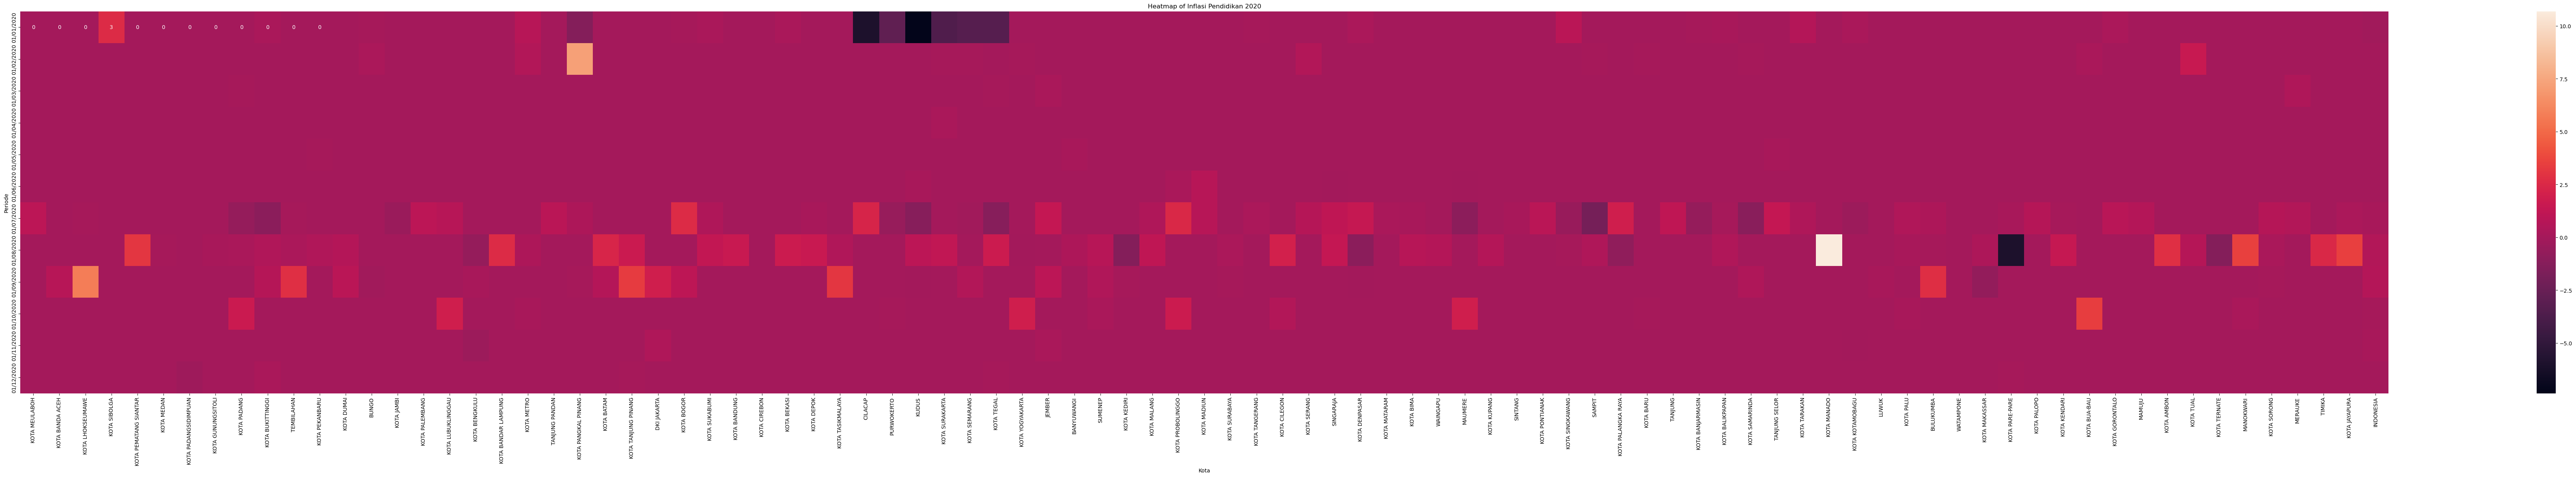

In [57]:
plt.figure(figsize=(100, 13))
sns.heatmap(df_ip_pendidikan_2020_transpose, annot=True, fmt=".2f")
plt.title('Heatmap of Inflasi Pendidikan 2020')
plt.xlabel('Kota')
plt.ylabel('Periode')
plt.show()


In [47]:
df_ip_pendidikan_2020_transpose['Kota'] = pd.to_datetime(df_ip_pendidikan_2020_transpose['Kota'], format='%m/%d/%Y')
# df_ip_pendidikan_2020_transpose.head()

KeyError: 'Kota'

In [ ]:
# df_ip_pendidikan.pivot(index=[''])

#UBAH DLU DATANYA, JADI BUKAN JANUARI, TPAI LANGSUNG FORMAT TANGGAL KEK 2020-01-01, 2020=02-01, 2020-03-01, dst